# LSTM

Descargar:
https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving international-airline-passengers.csv to international-airline-passengers.csv
User uploaded file "international-airline-passengers.csv" with length 2334 bytes


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.0414
Epoch 2/100
 - 0s - loss: 0.0202
Epoch 3/100
 - 0s - loss: 0.0146
Epoch 4/100
 - 0s - loss: 0.0131
Epoch 5/100
 - 0s - loss: 0.0121
Epoch 6/100
 - 0s - loss: 0.0111
Epoch 7/100
 - 0s - loss: 0.0102
Epoch 8/100
 - 0s - loss: 0.0093
Epoch 9/100
 - 0s - loss: 0.0081
Epoch 10/100
 - 0s - loss: 0.0071
Epoch 11/100
 - 0s - loss: 0.0062
Epoch 12/100
 - 0s - loss: 0.0053
Epoch 13/100
 - 0s - loss: 0.0045
Epoch 14/100
 - 0s - loss: 0.0038
Epoch 15/100
 - 0s - loss: 0.0033
Epoch 16/100
 - 0s - loss: 0.0029
Epoch 17/100
 - 0s - loss: 0.0026
Epoch 18/100
 - 0s - loss: 0.0024
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0022
Epoch 21/100
 - 0s - loss: 0.0021
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0021
Epoch

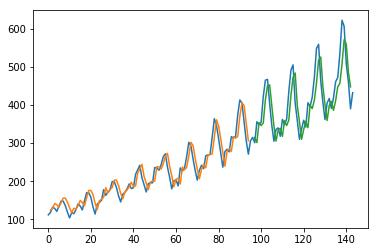

In [2]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Ojo, decalaje de un t


For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t), as well as the two prior times (t-1 and t-2) as input variables.

Epoch 1/100
 - 1s - loss: 0.0544
Epoch 2/100
 - 0s - loss: 0.0259
Epoch 3/100
 - 0s - loss: 0.0167
Epoch 4/100
 - 0s - loss: 0.0145
Epoch 5/100
 - 0s - loss: 0.0129
Epoch 6/100
 - 0s - loss: 0.0117
Epoch 7/100
 - 0s - loss: 0.0105
Epoch 8/100
 - 0s - loss: 0.0094
Epoch 9/100
 - 0s - loss: 0.0081
Epoch 10/100
 - 0s - loss: 0.0074
Epoch 11/100
 - 0s - loss: 0.0066
Epoch 12/100
 - 0s - loss: 0.0060
Epoch 13/100
 - 0s - loss: 0.0056
Epoch 14/100
 - 0s - loss: 0.0052
Epoch 15/100
 - 0s - loss: 0.0050
Epoch 16/100
 - 0s - loss: 0.0049
Epoch 17/100
 - 0s - loss: 0.0046
Epoch 18/100
 - 0s - loss: 0.0045
Epoch 19/100
 - 0s - loss: 0.0045
Epoch 20/100
 - 0s - loss: 0.0043
Epoch 21/100
 - 0s - loss: 0.0043
Epoch 22/100
 - 0s - loss: 0.0042
Epoch 23/100
 - 0s - loss: 0.0042
Epoch 24/100
 - 0s - loss: 0.0042
Epoch 25/100
 - 0s - loss: 0.0040
Epoch 26/100
 - 0s - loss: 0.0041
Epoch 27/100
 - 0s - loss: 0.0040
Epoch 28/100
 - 0s - loss: 0.0040
Epoch 29/100
 - 0s - loss: 0.0039
Epoch 30/100
 - 0s - lo

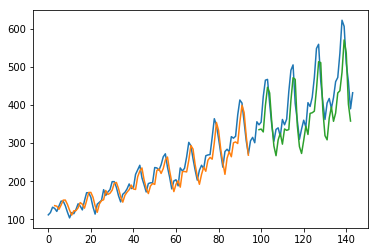

In [3]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Método del gradiente
## Cambio del error al aproximarse al valor correcto

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
habitaciones = [1.0, 2.0, 3.0, 4.0]
precios = [6.0, 12.0, 18.0, 24.0]

In [0]:
def prediccion(habitaciones,omega):
   return habitaciones * omega

In [0]:
def loss(habitaciones, precio_real,omega):
   prediccion_precio = prediccion(habitaciones,omega)
   return (prediccion_precio - precio_real) ** 2

In [8]:

omega_list = []
mse_list = []
for omega in np.arange(3.0, 9.1, 1):
   print("omega=", omega)
   print("\t Hab Pre_real Pre_pred Err_cua")
   err_sum = 0
   for habitaciones_val, precios_val in zip(habitaciones, precios):
       precio_pred_val = prediccion(habitaciones_val, omega)
       err_cuad = loss(habitaciones_val, precios_val,omega)
       err_sum += err_cuad
       print("\t", habitaciones_val, precios_val, precio_pred_val, err_cuad)
   print("MSE=", err_sum / len(habitaciones))
   omega_list.append(omega)
   mse_list.append(err_sum / len(habitaciones))



omega= 3.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 3.0 9.0
	 2.0 12.0 6.0 36.0
	 3.0 18.0 9.0 81.0
	 4.0 24.0 12.0 144.0
MSE= 67.5
omega= 4.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 4.0 4.0
	 2.0 12.0 8.0 16.0
	 3.0 18.0 12.0 36.0
	 4.0 24.0 16.0 64.0
MSE= 30.0
omega= 5.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 5.0 1.0
	 2.0 12.0 10.0 4.0
	 3.0 18.0 15.0 9.0
	 4.0 24.0 20.0 16.0
MSE= 7.5
omega= 6.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 6.0 0.0
	 2.0 12.0 12.0 0.0
	 3.0 18.0 18.0 0.0
	 4.0 24.0 24.0 0.0
MSE= 0.0
omega= 7.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 7.0 1.0
	 2.0 12.0 14.0 4.0
	 3.0 18.0 21.0 9.0
	 4.0 24.0 28.0 16.0
MSE= 7.5
omega= 8.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 8.0 4.0
	 2.0 12.0 16.0 16.0
	 3.0 18.0 24.0 36.0
	 4.0 24.0 32.0 64.0
MSE= 30.0
omega= 9.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 9.0 9.0
	 2.0 12.0 18.0 36.0
	 3.0 18.0 27.0 81.0
	 4.0 24.0 36.0 144.0
MSE= 67.5


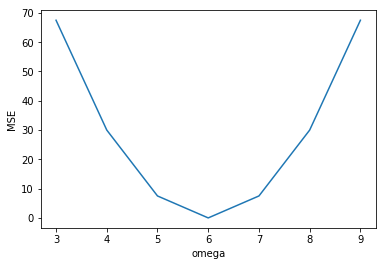

In [9]:
plt.plot(omega_list, mse_list)
plt.ylabel('MSE')
plt.xlabel('omega')
plt.show()


## Metodo del gradiente

For the fitting line: y = 8x 
SSE: 1313400.00
Starting line: y = 8.00x - Error: 1313400.00
At step 1 - Line: y = 4.020x  - Error: 1287263.34
At step 101 - Line: y = 5.275x  - Error: 172467.12
At step 201 - Line: y = 5.735x  - Error: 23107.09
At step 301 - Line: y = 5.903x  - Error: 3095.88
At step 401 - Line: y = 5.964x  - Error: 414.79
At step 501 - Line: y = 5.987x  - Error: 55.57
At step 601 - Line: y = 5.995x  - Error: 7.45
At step 701 - Line: y = 5.998x  - Error: 1.00
At step 801 - Line: y = 5.999x  - Error: 0.13
At step 901 - Line: y = 6.000x  - Error: 0.02

Best line: y = 6.00x  - Error: 0.00


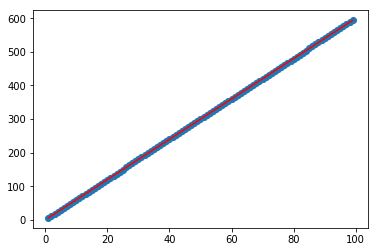

In [10]:
# Minimizing a quadratic function
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def SSE(m, data):
    totalError = 0.0
    totalNan = 0
    for i in range(data.shape[0]):
        if (math.isnan(data.iloc[i, 0])):
            totalNan += 1
        else:
            yOutput = m * data.iloc[i, 0]
            y = data.iloc[i, 1]
            error = (y - yOutput) ** 2
            totalError = totalError + error

    return totalError


def gradient_descent_step(m, data):
    n_points = data.shape[0]  # size of data


    m_grad = 0
    b_grad = 0
    stepper = 0.0003  # this is the learning rate
    for i in range(n_points):
        # Get current pair (x,y)
        x = data.iloc[i, 0]
        y = data.iloc[i, 1]
        if (math.isnan(x) | math.isnan(y)):  # it will prevent for crashing when some data is missing
            # print("is nan")
            continue
        # you will calculate the partical derivative for each value in data

        # Partial derivative respect 'm'
        dm = -((2 / n_points) * x * (y - (m * x )))



        # Update gradient
        m_grad = m_grad + dm

        # Set the new 'better' updated 'm' and 'b'
        m_updated = m - stepper * m_grad

    return m_updated


X = np.arange(1,100)
y = 6 * X 
data = pd.DataFrame(data={'x': X, 'y': y})

m = 8
sse = SSE(m,data)
print('For the fitting line: y = %sx \nSSE: %.2f' %(m,sse))

print('Starting line: y = %.2fx - Error: %.2f' % (m, sse))

for i in range(1000):
    m = gradient_descent_step(m,  data)
    sse = SSE(m, data)
    if i%100==0:
        print('At step %d - Line: y = %.3fx  - Error: %.2f' %(i+1,m,sse))

print('\nBest line: y = %.2fx  - Error: %.2f' % (m, sse))
plt.scatter(X, y)
plt.plot(X, m * X, color='red')
plt.show()

## Gradiente 2 valores

For the fitting line: y = 5x + 3
SSE: 308946.00
Starting line: y = 5.00x + 3.00 - Error: 308946.00
At step 1 - Line: y = 6.930x + 3.029 - Error: 303076.56
At step 101 - Line: y = 6.338x + 2.990 - Error: 44571.76
At step 201 - Line: y = 6.111x + 2.958 - Error: 6622.07
At step 301 - Line: y = 6.025x + 2.928 - Error: 1048.92
At step 401 - Line: y = 5.992x + 2.899 - Error: 228.57
At step 501 - Line: y = 5.980x + 2.871 - Error: 105.98
At step 601 - Line: y = 5.975x + 2.844 - Error: 85.87
At step 701 - Line: y = 5.974x + 2.816 - Error: 80.88
At step 801 - Line: y = 5.973x + 2.790 - Error: 78.15
At step 901 - Line: y = 5.974x + 2.764 - Error: 75.83
At step 1001 - Line: y = 5.974x + 2.738 - Error: 73.61
At step 1101 - Line: y = 5.974x + 2.712 - Error: 71.47
At step 1201 - Line: y = 5.975x + 2.687 - Error: 69.39
At step 1301 - Line: y = 5.975x + 2.662 - Error: 67.37
At step 1401 - Line: y = 5.975x + 2.638 - Error: 65.40
At step 1501 - Line: y = 5.976x + 2.614 - Error: 63.50
At step 1601 - Line:

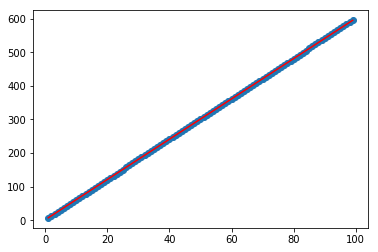

In [11]:
# Minimizing a quadratic function
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def SSE(m, b, data):
    totalError = 0.0
    totalNan = 0
    for i in range(data.shape[0]):
        if (math.isnan(data.iloc[i, 0])):
            totalNan += 1
        else:
            yOutput = m * data.iloc[i, 0] + b
            y = data.iloc[i, 1]
            error = (y - yOutput) ** 2
            totalError = totalError + error

    return totalError


def gradient_descent_step(m, b, data):
    n_points = data.shape[0]  # size of data


    m_grad = 0
    b_grad = 0
    stepper = 0.0003  # this is the learning rate
    for i in range(n_points):
        # Get current pair (x,y)
        x = data.iloc[i, 0]
        y = data.iloc[i, 1]
        if (math.isnan(x) | math.isnan(y)):  # it will prevent for crashing when some data is missing
            # print("is nan")
            continue
        # you will calculate the partical derivative for each value in data

        # Partial derivative respect 'm'
        dm = -((2 / n_points) * x * (y - (m * x + b)))

        # Partial derivative respect 'b'
        db = -((2 / n_points) * (y - (m * x + b)))

        # Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db
        # Set the new 'better' updated 'm' and 'b'
        m_updated = m - stepper * m_grad
        b_updated = b - stepper * b_grad
    return m_updated, b_updated


X = np.arange(1,100)
y = 6 * X + 1
data = pd.DataFrame(data={'x': X, 'y': y})

m = 5
b = 3
sse = SSE(m,b,data)
print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

print('Starting line: y = %.2fx + %.2f - Error: %.2f' % (m, b, sse))

for i in range(10000):
    m, b = gradient_descent_step(m, b, data)
    sse = SSE(m, b, data)
    if i%100==0:
        print('At step %d - Line: y = %.3fx + %.3f - Error: %.2f' %(i+1,m,b,sse))

print('\nBest line: y = %.2fx + %.2f - Error: %.2f' % (m, b, sse))
plt.scatter(X, y)
plt.plot(X, m * X + b, color='red')
plt.show()